<a href="https://colab.research.google.com/github/LiamDuero03/DS-Society-Project/blob/main/Extra ML Material/Ensembles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble Learning: Strength in Numbers
An **Ensemble** combines multiple models to create one "super model."

1. **Bagging (Random Forest):** Trains many trees independently on different subsets of data and averages their results. It reduces **variance** (prevents overfitting).
2. **Boosting (Gradient Boosting):** Trains trees sequentially. Each new tree tries to fix the specific errors made by the previous trees. It reduces **bias** (improves accuracy).

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Generate complex synthetic data
np.random.seed(42)
X = np.sort(10 * np.random.rand(200, 1), axis=0)

# FIX: Ensure all components of y are flattened to 1D
y = np.sin(X).ravel() + np.exp(X * 0.1).flatten() + np.random.normal(0, 0.2, X.shape[0])

# Now the split will result in matching shapes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Verify shapes
print(f"X_train shape: {X_train.shape}") # (160, 1)
print(f"y_train shape: {y_train.shape}") # (160,)

X_train shape: (160, 1)
y_train shape: (160,)


## 1. Random Forest (Bagging)
Random Forest builds hundreds of trees. Each tree only sees a random "bag" of the data. By averaging them, the "extreme" errors of individual trees cancel each other out.

In [8]:
# Initialize and fit
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

## 2. Gradient Boosting (Boosting)
Unlike Random Forest, Gradient Boosting builds trees one at a time. Each tree is trained to predict the **residuals** (the mistakes) of the tree before it.

In [9]:
# Initialize the model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model - using .ravel() to fix the shape of y_train
gb_model.fit(X_train, y_train.ravel())

# Predict
gb_pred = gb_model.predict(X_test)

## 3. Visualizing the "Fit"
Notice how the Ensemble models create a much smoother "staircase" than the single Decision Tree. They follow the data more closely without being as "twitchy" as a single tree.

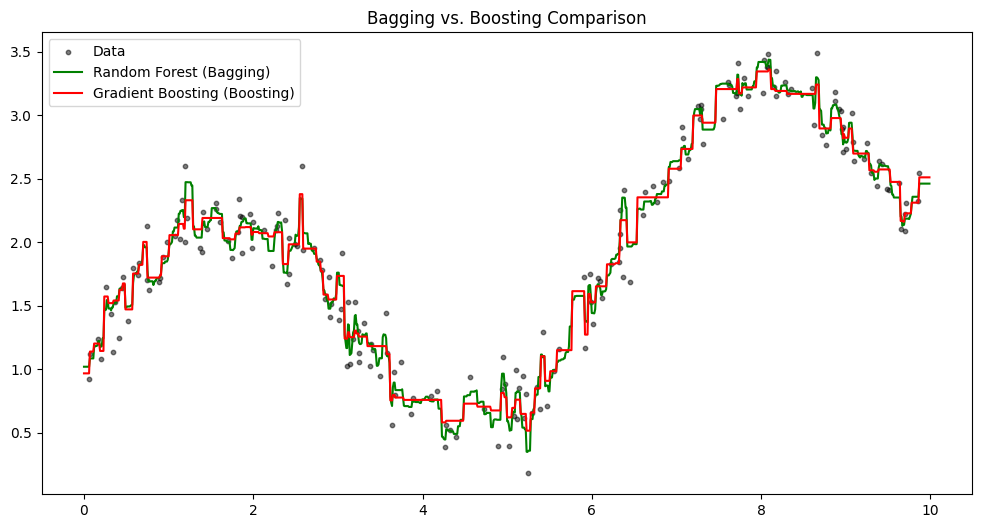

In [10]:
X_grid = np.arange(0.0, 10.0, 0.01)[:, np.newaxis]

plt.figure(figsize=(12, 6))
plt.scatter(X, y, s=10, color="black", alpha=0.5, label="Data")
plt.plot(X_grid, rf_model.predict(X_grid), color="green", label="Random Forest (Bagging)")
plt.plot(X_grid, gb_model.predict(X_grid), color="red", label="Gradient Boosting (Boosting)")
plt.legend()
plt.title("Bagging vs. Boosting Comparison")
plt.show()

## 4. Final Showdown: Metrics
Which one performed better? Usually, Boosting is more accurate, but Bagging is harder to overfit.

### Ensembles Comparison
| Feature | Random Forest (Bagging) | Gradient Boosting |
| :--- | :--- | :--- |
| **Strategy** | Parallel (Independent trees) | Sequential (Corrective trees) |
| **Main Goal** | Reduce Overfitting (Variance) | Reduce Underfitting (Bias) |
| **Key Tuning** | `n_estimators`, `max_features` | `learning_rate`, `n_estimators` |

In [11]:
print(f"Random Forest R²: {r2_score(y_test, rf_pred):.4f}")
print(f"Gradient Boosting R²: {r2_score(y_test, gb_pred):.4f}")

Random Forest R²: 0.8990
Gradient Boosting R²: 0.9225
